Aim of this notebook is to Use TF-IDF feature for classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
import re

In [2]:
data = pd.read_csv("tweets.csv")
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [3]:
#dropping id variable 
data.drop(["id"], axis = 1, inplace = True)

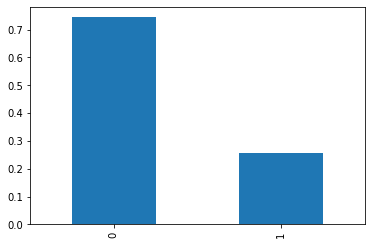

In [4]:
data.label.value_counts(normalize = True).plot(kind = "bar")

In [5]:
#We are dealing with imbalanced class problem

In [6]:
#creating lemmatizer and stopwords object
lemmatizer = WordNetLemmatizer()
nltk.download("stopwords")
stop_words = stopwords.words("english")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
#creating dictionary for contraction mapping
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [8]:
def clean_tweet(x):
  x = re.sub("#", "", x) #remove hashtags
  x = re.sub("@\w+", "", x) #removing mentions
  x = ' '.join([ contraction_mapping[token] if token in contraction_mapping else token for token in x.split(" ")])
  x = re.sub("http\S+", "", x) #removing links
  x = re.sub("'s\b", "", x) #removing 's
  x = re.sub("[^a-zA-Z]", " ", x) #fetching only letters
  x = x.lower() #lowercasing
  x = [ w for w in x.split() if not w in stop_words ] #removing stopwords
  final_string = ""
  for token in x:
    final_string = final_string + lemmatizer.lemmatize(token) + " "
  return final_string.strip()

In [9]:
data.tweet = data.tweet.apply( lambda x: clean_tweet(x) )
data.tweet[0]

'fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone'

**Data Visualization**

Understanding the commonly occuring words in the tweets

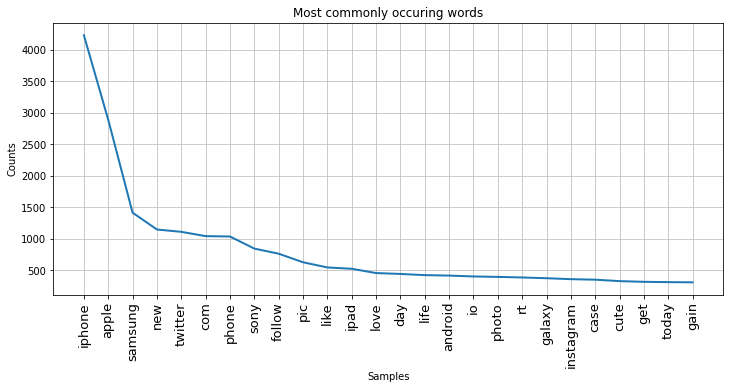

In [10]:
all_words = []
for line in data['tweet']:
  for token in line.split(" "):
    all_words.append(token)

plt.figure(figsize = (12, 5))
plt.title("Most commonly occuring words")
plt.xticks(fontsize = 13, rotation = 90)
fd = nltk.FreqDist(all_words)
fd.plot(26, cumulative = False)  

**Model Building**

The main idea behinf tf-idf is to increase the importance of the words that occur in the subset of documents rather than the words occuring in all the documents

TF-IDF score of every word in vocabulary is calculated and used to build the feature space

In [11]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(data.tweet)
features.shape

(7920, 15802)

In [12]:
from sklearn.model_selection import train_test_split
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(features, data.label, test_size=0.3, random_state=42)

Training model

In [13]:
lr = LogisticRegression() #instantiating model

lr.fit(xtrain_bow, ytrain) #training model

predict = lr.predict(xvalid_bow) #predicting on validation set

f1_score(predict, yvalid)

0.6778711484593838